In [1]:
import os
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import copy
import matplotlib.dates as mdate
import scipy.optimize as spo
from scipy.stats import norm
import statsmodels.api as sm

In [2]:
def medianpeak(x):
    y=np.copy(x)
    ymedian=np.median(y)
    zmid=np.median(np.abs(y-np.median(y)))
    y[y<=ymedian-5.2*zmid]=(ymedian-5.2*zmid)
    y[y>=ymedian+5.2*zmid]=(ymedian+5.2*zmid)
    return y
def nondimensionalize(x):
    y=np.copy(x)
    ymean=np.mean(y)
    ystd=np.std(y)
    y=(y-ymean)/ystd
    return y
def dadjust(data):
    data0=copy.deepcopy(data)
    index1=data0.index.to_period(freq=frequency).values
    fre=np.unique(index1)
    data0.index=index1
    data0.index=data0.index.to_series().astype(str).values
    return data0

In [3]:
frequency='W'
gronum1=50
path1='C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\'

In [4]:
trdayfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\tradeday.csv'
stfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\ST.csv'
stand9500='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\stand.csv'
closep='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\closeprice.csv'
mvalue0='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\marketvalue.csv'
trdaydata=pd.read_csv(trdayfile,parse_dates=True,index_col=0)
u=trdaydata.index[0]
trdaydata=trdaydata.T
for i in range(len(trdaydata)):
    y=trdaydata.iloc[i]
    z=y[y==1].index
    if len(z)>250:
        if z[0]!=u:
                y[z[0]:z[250]]=0
        else:
            y=y
    elif len(z)==0:
        y=y
    else:
        y[z[0]:]=0
trdaydata=trdaydata.T
trdaydata0=dadjust(trdaydata)
stdata=pd.read_csv(stfile,parse_dates=True,index_col=0)
stdata0=dadjust(stdata)
stand00=pd.read_csv(stand9500,parse_dates=True,index_col=0)
stand500=dadjust(stand00)
closepr=pd.read_csv(closep,parse_dates=True,index_col=0)
closeprice=dadjust(closepr)
mvalue=pd.read_csv(mvalue0,parse_dates=True,index_col=0)
mvalue=dadjust(mvalue)
stfre=np.unique(stdata0.index)

In [5]:
for i in range(len(stfre)):
    tradeday0=trdaydata0.loc[stfre[i]]
    st0=stdata0.loc[stfre[i]]
    wstand500=stand500.loc[stfre[i]]
    #wcloseprice=closeprice.loc[stfre[i]]
    l=len(pd.DataFrame(st0).T)
    if i ==0:
        w_stand500=pd.DataFrame(wstand500).T
        tradeday=pd.DataFrame(tradeday0).T
        st=pd.DataFrame(st0).T
        #w_closeprice=pd.DataFrame(wcloseprice).T
    else:
        if l!=1:
            tradeday1=tradeday0[len(tradeday0)-1:len(tradeday0)]
            tradeday=tradeday.append(tradeday1)
            st1=st0[len(st0)-1:len(st0)]
            #wcloseprice1=wcloseprice[len(wcloseprice)-1:len(wcloseprice)]
            #w_closeprice=w_closeprice.append(wcloseprice1)
            st= st.append(st1)
            wstand5001= wstand500[len(wstand500)-1:len(wstand500)]
            w_stand500=w_stand500.append(wstand5001)
        else:
            tradeday2=pd.DataFrame(tradeday0).T
            tradeday=tradeday.append(tradeday2)
            st2=pd.DataFrame(st0).T
            st= st.append(st2)
            #wcloseprice2=pd.DataFrame(wcloseprice).T
            #w_closeprice=w_closeprice.append(wcloseprice2)
            wstand5002=pd.DataFrame(wstand500).T
            w_stand500=w_stand500.append(wstand5002)   

In [6]:
rate500=(stand500-stand500.shift(1))/stand500.shift(1)
closerate=(closeprice-closeprice.shift(1))/closeprice.shift(1)
w_rate500=(w_stand500-w_stand500.shift(1))/w_stand500.shift(1)
w_rate500=w_rate500[1:]

In [7]:
ratefile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\rate.csv'
errate11=pd.read_csv(ratefile,parse_dates=True,index_col=0)
errate1=dadjust(errate11)

In [158]:
file={}
name1=os.listdir(path1)

In [9]:
del name1[11]

In [159]:
file={}
data={}
key=[]
data0={}
fre={}
for i in range(len(name1)):
    file[i]=os.path.join(path1,name1[i])
    data[name1[i][0:-4]]=pd.read_csv(file[i],parse_dates=True,index_col=0)
    key.append(name1[i][0:-4])
    data0[key[i]]=dadjust(data[key[i]])
fre=np.unique(data0[key[len(name1)-1]].index)

In [173]:
dic={}
group={}
n_group={}
n_dic={}
all_index={}
for i in range(len(fre)+1):
    tradeday0=tradeday.loc[fre[i-1]]
    dindex=tradeday0[tradeday0!=0].T.dropna().index
    ust=st.loc[fre[i-1]]
    ust=ust[ust!=1]
    d_gindex=ust[dindex].dropna().index
    profit=pd.DataFrame(errate1[d_gindex].loc[fre[i-1]].dropna().astype(float))
    if i ==0:
        n_dic[i]=0
    else:
        d_gindex=d_gindex&data0[key[1]].loc[fre[i-1]].T.index
        for mu in range(len(key)):
            data1=data0[key[mu]].loc[fre[i-1]]
            d_gindex=d_gindex&data1.index
        for mu in range(len(key)):
            data1=data0[key[mu]].loc[fre[i-1]]
            data1=data1[d_gindex]
            #data1=data1.dropna().astype(float)
            data1=pd.DataFrame(data1).apply(medianpeak).apply(nondimensionalize)
            c_data=data1
            profit=profit.loc[d_gindex]
            if mu==0:
                n_data=copy.deepcopy(c_data)
            else:
                n_data=pd.concat([n_data,c_data],axis=1,join='inner')
        
        x=sm.add_constant(n_data)
        model=sm.OLS(profit,x)
        result=model.fit()
        redi=pd.DataFrame(result.resid)
        #n_data=pd.DataFrame(profit.values-redi.values,index=redi.index)
        n_data=redi.sort_values(by=0,ascending=False)#n_data.dropna().sort_values(by=0,ascending=False)
        n_l=len(n_data)
        for j in range(int(gronum1)):
                n_group[j]=n_data[round(((j)/int(gronum1))*n_l):round(((j+1)/int(gronum1))*n_l)].index
        n_dic[i]=copy.deepcopy(n_group)
        '''if result.pvalues[1:2][0]<0.05:
                c_data=data1*result.params[1:2].values[0]
                if ind==0:
                    n_data=copy.deepcopy(c_data)
                    ind=1
                else:
                    n_data=n_data+c_data
        n_data=n_data.dropna().sort_values(by=fre[i-1],ascending=False)
        n_l=len(n_data)
        for j in range(int(gronum1)):
                n_group[j]=n_data[round(((j)/int(gronum1))*n_l):round(((j+1)/int(gronum1))*n_l)].index
        n_dic[i]=copy.deepcopy(n_group)'''

In [174]:
n_mrate=np.zeros(len(fre)-1)
n_dicrate={}
n_grorate=np.zeros(int(gronum1))
for j in range(int(gronum1)):
    for i in range(len(fre)-1):
        n_mrate[i]=errate1[n_dic[i+1][j]].loc[fre[i+1]].mean()
    n_dicrate[j]= copy.deepcopy(n_mrate)
for k in n_dicrate:
    n_grorate[k]=n_dicrate[k].mean()

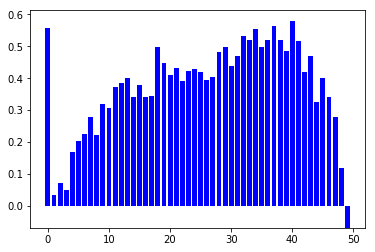

In [175]:
num=np.arange(len(n_grorate))
plt.bar(num,n_grorate, color = 'b')
plt.show()

In [176]:
unitnet0=n_dicrate[0]-0.2
unitnet=unitnet0.cumsum()
unitnet=unitnet/100+1
w_rate=w_rate500.cumsum()+1

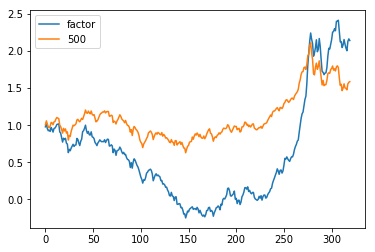

In [177]:
plt.plot(unitnet,label='factor')
plt.plot(w_rate.T.values[0][0:len(unitnet)],label='500')
plt.legend(loc=0, numpoints=1)
plt.show()

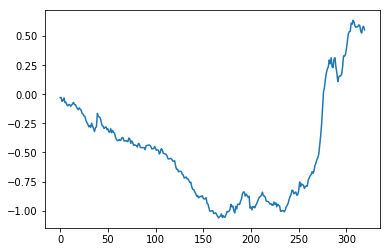

In [178]:
plt.plot(unitnet-w_rate.T.values[0][0:len(unitnet)])
plt.show()

In [22]:
for mu in range(2):#len(key)):
            data1=data0[key[mu]].loc[fre[i-1]]
            data1=data1[d_gindex]
            #data1=data1.dropna().astype(float)
            data1=pd.DataFrame(data1).apply(medianpeak).apply(nondimensionalize)
            c_data=data1
            if mu==0:
                n_data=copy.deepcopy(c_data)
            else:
                n_data=pd.concat([n_data,c_data],axis=1,join='inner')

C:\Users\wuboyuan\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3569: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)
C:\Users\wuboyuan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in less_equal
C:\Users\wuboyuan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in greater_equal


In [53]:
data0[key[1]][d_gindex].loc[fre[1-1]]

特锐德     9.973537e+07
神州泰岳    2.551006e+08
乐普医疗    2.828078e+08
南风股份    4.617145e+07
探路者     4.030334e+07
莱美药业    4.930641e+07
汉威电子    3.758214e+07
天海防务    4.893008e+07
安科生物    5.025541e+07
立思辰     4.809251e+07
鼎汉技术    7.605240e+07
华测检测    6.545163e+07
新宁物流    3.473624e+07
亿纬锂能    4.458000e+07
爱尔眼科    1.123733e+08
北陆药业    3.523503e+07
网宿科技    5.435339e+07
中元股份    5.984613e+07
硅宝科技    3.589696e+07
银江股份    4.601911e+07
大禹节水    2.638606e+07
宝德股份    3.021489e+07
机器人     6.616297e+07
华星创业    2.971540e+07
红日药业    7.781001e+07
华谊兄弟    9.478452e+07
金亚科技    3.068245e+07
天龙光电    8.883385e+07
阳普医疗    2.749465e+07
宝通科技    5.703253e+07
            ...     
圣农发展    2.048823e+08
太阳电缆    1.493887e+08
齐心集团    8.775497e+07
西部建设    8.127092e+07
美盈森     1.481915e+08
洋河股份    1.417860e+09
南国置业    2.418461e+08
中科云网    1.198603e+08
北新路桥    6.983457e+07
威创股份    1.465093e+08
中利集团    2.416610e+08
东方园林    9.660153e+07
海大集团    2.160610e+08
三泰控股    3.158040e+07
日海通讯    1.149060e+08
南山控股    1.771735e+08
焦点科技    8.127

In [51]:
d_gindex=d_gindex&data0[key[1]].T.index

In [50]:
data0[key[1]].T.index

Index(['科信技术', '精测电子', '汇金科技', '乐心医疗', '神宇股份', '激智科技', '贝达药业', '丝路视觉', '理工光科',
       '中富通',
       ...
       '和而泰', '爱仕达', '嘉欣丝绸', '三晖电气', '快意电梯', '捷荣技术', '美芝股份', '皮阿诺', '道道全',
       '力盛赛车'],
      dtype='object', length=3159)

In [37]:
data0

['cmvalue',
 'EBIT息税前利润',
 'marketvalue',
 'PB',
 'PCF',
 'PE',
 'PS',
 '净资产收益率',
 '周成交金额',
 '周振幅2',
 '周换手率2',
 '开盘价',
 '每股公积金',
 '每股收益增长率',
 '营业利润率',
 '营业收入增长率',
 '资产负债率']

In [150]:
for mu in range(len(key)):
    data1=data0[key[mu]].loc[fre[i-1]]
    d_gindex=d_gindex&data1.index
for mu in range(len(key)):
    data1=data0[key[mu]].loc[fre[i-1]]
    data1=data1[d_gindex]
    #data1=data1.dropna().astype(float)
    data1=pd.DataFrame(data1).apply(medianpeak).apply(nondimensionalize)
    c_data=data1
    profit=profit.loc[d_gindex]
    if mu==0:
        n_data=copy.deepcopy(c_data)
    else:
        n_data=pd.concat([n_data,c_data],axis=1,join='inner')
x=sm.add_constant(n_data)
model=sm.OLS(profit,x)
result=model.fit()
redi=pd.DataFrame(result.resid)
n_data=pd.DataFrame(profit.values-redi.values,index=redi.index)
n_data=n_data.dropna().sort_values(by=0,ascending=False)
n_l=len(n_data)
for j in range(int(gronum1)):
    n_group[j]=n_data[round(((j)/int(gronum1))*n_l):round(((j+1)/int(gronum1))*n_l)].index
n_dic[i]=copy.deepcopy(n_group)

In [151]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     2011-06-20/2011-06-26   R-squared:                       0.118
Model:                               OLS   Adj. R-squared:                  0.109
Method:                    Least Squares   F-statistic:                     12.33
Date:                   Mon, 24 Apr 2017   Prob (F-statistic):           8.48e-33
Time:                           13:47:46   Log-Likelihood:                -4297.5
No. Observations:                   1582   AIC:                             8631.
Df Residuals:                       1564   BIC:                             8728.
Df Model:                             17                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                     4.4325      0.093     47.892      0.000         4.251     4.614
2011-06-20/2011-06-26    -0.4709      0.274     -1.717      0.086        -1.009     0.067
2011-06-20/2011-06-26     0.1932      0.220      0.877      0.381        -0.239     0.625
2011-06-20/2011-06-26    -0.3942      0.265     -1.486      0.138        -0.915     0.126
2011-06-20/2011-06-26    -0.2189      0.141     -1.548      0.122        -0.496     0.059
2011-06-20/2011-06-26    -0.0093      0.094     -0.098      0.922        -0.194     0.175
2011-06-20/2011-06-26     0.0966      0.095      1.015      0.310        -0.090     0.283
2011-06-20/2011-06-26     0.1148      0.142      0.808      0.419        -0.164     0.393
2011-06-20/2011-06-26     0.6340      0.155      4.083      0.000         0.329     0.939
2011-06-20/2011-06-26     1.1870      0.203      5.836      0.000         0.788     1.586
2011-06-20/2011-06-26     0.1974      0.124      1.596      0.111        -0.045     0.440
2011-06-20/2011-06-26     0.0375      0.174      0.216      0.829        -0.303     0.378
2011-06-20/2011-06-26    -0.2348      0.112     -2.101      0.036        -0.454    -0.016
2011-06-20/2011-06-26     0.5186      0.114      4.551      0.000         0.295     0.742
2011-06-20/2011-06-26    -0.0334      0.106     -0.315      0.753        -0.241     0.174
2011-06-20/2011-06-26    -0.0630      0.153     -0.411      0.681        -0.363     0.237
2011-06-20/2011-06-26     0.1980      0.102      1.938      0.053        -0.002     0.398
2011-06-20/2011-06-26     0.1465      0.121      1.216      0.224        -0.090     0.383
==============================================================================
Omnibus:                      258.951   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4440.844
Skew:                           0.115   Prob(JB):                         0.00
Kurtosis:                      11.205   Cond. No.                         7.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
redi

,0
恒通科技,0.815350
天孚通信,-2.141889
博世科,1.192565
苏试试验,3.026781
中文在线,2.304735
伊之密,0.496015
南华仪器,2.648400
快乐购,1.669669
三环集团,0.072002
道氏技术,-3.717118


In [136]:
c_data

,2011-06-20/2011-06-26
恒信移动,-1.270807
奥克股份,-1.622530
劲胜精密,-1.114205
海默科技,-1.936970
银之杰,-2.044655
康芝药业,-1.835426
荃银高科,-1.779633
长信科技,-1.959586
特锐德,-1.547760
神州泰岳,-1.770376
